In [1]:
import pandas as pd
import numpy as np
import csv
import os
import matplotlib.pyplot as plt #used to generate the legends
from typing import List

myListDir=os.listdir()
folder=input("The name of your input folder without extension: ")
while not folder+".0" in myListDir: #extension 0 certainly exists, as we have at least one rank
    print(folder+": wrong name")
    folder=input("The name of your input folder, without extension: ")

os.chdir("./"+folder+".0") #extension 0 certainly exists, as we have at least one rank

with open("plotInfo.csv","r") as data:
    reader = csv.reader(data, delimiter = ',')
    for row in reader:
        fileNameRoot=row[0] #the names of the files contating the data start with...
        rankNum=int(row[1]) #we have file from different ranks, reported in different folders with name, for a specific
                            #rank: fileNameRoot+"."+str(rank)
        ag0num=int(row[2])  #how many agents in each rank, with type==0

#current folders
print("Current folders are:")
for k in range(rankNum):
    print(folder+"."+str(k))

The name of your input folder without extension: prova3ranks
Current folders are:
prova3ranks.0
prova3ranks.1
prova3ranks.2


### uncomment to show all the rows in tables

In [2]:
#display all the rows of the dataframe  
#pd.set_option('display.max_rows', None)

# creation of firm dataframes

In [3]:
#each firm will have its dataframe
#containing the values of the names of the columns for all the time units (rows)
colNames=["firm class type", "initial inventories","total costs", "final inventories","profits", "added value",\
          "total production", "cost of production", "cost of unused factors","total lost production", \
          "total cost of lost production", "cost of labor", "cost of capital", "cost of substitution", "production type"]

#fileNameArray is the array that will contain the names of the file of the balance sheets (one file for each firm), 
#subdivided by ranks in the columns of the array; 'itemsize=len(fileNameRoot)+30' is supposed to be sufficient to 
#report the names of the file;
fileNameArray=np.chararray((ag0num, rankNum), itemsize=len(fileNameRoot)+30, unicode=True)

In [4]:
#operating by folders to load the names of the files reported in the balancesheetList files
for k in range(rankNum):
    #which folder
    os.chdir("../"+folder+"."+str(k))
    with open(fileNameRoot+"_balancesheetList_"+str(k)+".csv","r") as fileList:
        reader = csv.reader(fileList, delimiter = ',')
        #read the name of the files, containing _balancesheetList_, present in the current set of folders
        for row in reader:
            for i in range(len(row)):
                fileNameArray[i,k]=row[i]

                

In [5]:
#creating a dictionary of firm dataframes
firmData={}
for k in range(rankNum):
    #in the folder with name extension == k
    os.chdir("../"+folder+"."+str(k))
    #repeating for the number of agent type 0 in each folder
    for i in range(ag0num):
        #extracting the agent uid from the name of the file
        p1=fileNameArray[i,k].find('(')
        p2=fileNameArray[i,k].find(')')+1
        uid=fileNameArray[i,k][p1:p2]
        #filling the dictionary with uids as keys and the balancesheetLists of the related firm as values
        firmData[uid]=pd.read_csv(fileNameArray[i,k], header=None)

#naming the firm dataframe columns, firm by firm, by scrolling the keys of the dictionary
for aFirm in firmData.keys():
    firmData[aFirm].columns=colNames

# Retrieve a firm

In [6]:
#retrieve a firm with id and rank
def retrieveFirmBalancesheet(id,r):
    return firmData['('+str(id)+', 0, '+str(r)+')']

In [7]:
#example
retrieveFirmBalancesheet(0,0)

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.0,150.210482,24.0,-126.210482,24.0,9.117765,24.0,126.210482,0.0,0.0,80.0,70.210482,58.508735,1.0
1,0.0,24.0,150.210482,62.0,-112.210482,38.0,14.536188,38.0,112.210482,0.0,0.0,80.0,70.210482,58.508735,1.0
2,0.0,62.0,150.210482,108.0,-104.210482,46.0,17.687693,46.0,104.210482,0.0,0.0,80.0,70.210482,58.508735,1.0
3,0.0,108.0,150.210482,172.0,-86.210482,64.0,24.407486,64.0,86.210482,0.0,0.0,80.0,70.210482,58.508735,1.0
4,0.0,172.0,150.210482,264.0,-58.210482,92.0,35.033634,92.0,58.210482,0.0,0.0,80.0,70.210482,58.508735,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,11836.0,135.386371,11954.0,-17.386371,118.0,44.474692,118.0,17.386371,0.0,0.0,60.0,75.386371,62.821976,1.0
96,0.0,11954.0,135.386371,12074.0,-15.386371,120.0,44.611597,120.0,15.386371,0.0,0.0,60.0,75.386371,62.821976,1.0
97,0.0,12074.0,135.386371,12188.0,-21.386371,114.0,42.380923,114.0,21.386371,0.0,0.0,60.0,75.386371,62.821976,1.0
98,0.0,12188.0,135.386371,12302.0,-21.386371,114.0,42.380923,114.0,21.386371,0.0,0.0,60.0,75.386371,62.821976,1.0


# The allFirmData dataframe

In [8]:
#create a dataframe summing up all the firm dataframes
allFirmData=firmData[list(firmData.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                      #independent copy with a new name

for aFirmUid in list(firmData.keys())[1:]: #from the second to the last
    allFirmData=allFirmData.add(firmData[aFirmUid])

allFirmData.__description__="all firms"

In [9]:
allFirmData

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,645.0,0.000000e+00,10882.882801,2.097083e+03,-8785.799468,2097.083333,826.938009,2097.083333,8785.799468,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
1,645.0,2.097083e+03,10882.882801,6.245583e+03,-6734.382801,4148.500000,1646.810429,4148.500000,6734.382801,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
2,645.0,6.245583e+03,10882.882801,1.163758e+04,-5490.882801,5392.000000,2140.409895,5392.000000,5490.882801,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
3,645.0,1.163758e+04,10882.882801,1.796183e+04,-4558.632801,6324.250000,2495.608387,6324.250000,4558.632801,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
4,645.0,1.796183e+04,10882.882801,2.471408e+04,-4130.632801,6752.250000,2654.529572,6752.250000,4130.632801,0.0,0.0,6167.0,4715.882801,3929.902334,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,645.0,1.183618e+06,16761.200813,1.197879e+06,-2500.284146,14260.916667,5674.363469,14260.916667,2500.284146,0.0,0.0,9363.0,7400.356905,4164.280228,30.0
96,645.0,1.197879e+06,16763.356905,1.212078e+06,-2564.523572,14198.833333,5642.464403,14198.833333,2564.523572,0.0,0.0,9335.0,7412.215186,4253.594675,30.0
97,645.0,1.212078e+06,16747.215186,1.226283e+06,-2541.798520,14205.416667,5654.472117,14205.416667,2541.798520,0.0,0.0,9335.0,7423.701694,4392.342346,30.0
98,645.0,1.226283e+06,16758.701694,1.240419e+06,-2622.951694,14135.750000,5630.006363,14135.750000,2622.951694,0.0,0.0,9307.0,7429.484175,4346.768074,30.0


In [10]:
allFirmData.__description__

'all firms'

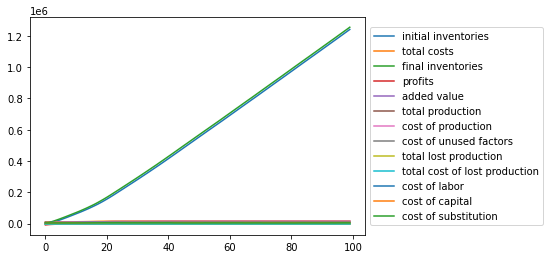

In [11]:
allFirmData.drop(['firm class type', 'production type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

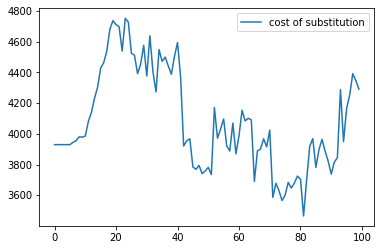

In [12]:
allFirmData[['cost of substitution']].plot()

<AxesSubplot: >

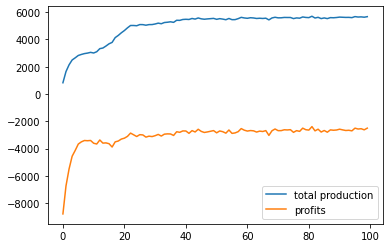

In [13]:
allFirmData[['total production', 'profits']].plot()

<AxesSubplot: >

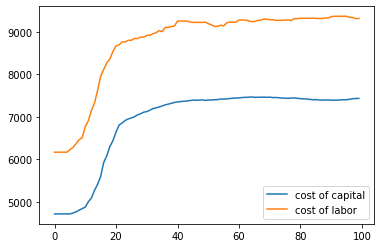

In [14]:
allFirmData[['cost of capital','cost of labor']].plot()

# Considering groups of firms

In [15]:
#summarize a subset of balancesheets of firm with 'dimensional class' in a given list
def sumBalancesheetsWithAGivenDimensionalClass(dimClassList: List):
    tmpDict={}
    for aFirmUid in list(firmData.keys())[:]:
        if firmData[aFirmUid]['firm class type'].loc[0] in dimClassList:
            tmpDict[aFirmUid]=firmData[aFirmUid]
    print("found",len(tmpDict), "firms")
    
    if tmpDict=={}: return 0 #firms with the required dimensional class: not found
        
    allLocalFirmData=tmpDict[list(tmpDict.keys())[0]].copy() #copy the dataframe of first firm; use .copy to create an
                                                              #independent copy with a new name

    for aFirmUid in list(tmpDict.keys())[1:]: #from the second to the last
        allLocalFirmData=allLocalFirmData.add(tmpDict[aFirmUid])

    memo="firms of groups"
    for g in dimClassList: memo = memo +" "+str(g)
    allLocalFirmData.__description__= memo
    
    return allLocalFirmData


In [16]:
#example with dimensional class 0
sumOfBalanceSheetSubset = sumBalancesheetsWithAGivenDimensionalClass([0])

found 30 firms


In [17]:
sumOfBalanceSheetSubset.__description__

'firms of groups 0'

In [18]:
sumOfBalanceSheetSubset

,firm class type,initial inventories,total costs,final inventories,profits,added value,total production,cost of production,cost of unused factors,total lost production,total cost of lost production,cost of labor,cost of capital,cost of substitution,production type
0,0.0,0.0,3886.006020,560.0,-3326.006020,560.0,214.139793,560.0,3326.006020,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
1,0.0,560.0,3886.006020,1682.0,-2764.006020,1122.0,427.153922,1122.0,2764.006020,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
2,0.0,1682.0,3886.006020,3258.0,-2310.006020,1576.0,597.620504,1576.0,2310.006020,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
3,0.0,3258.0,3886.006020,5372.0,-1772.006020,2114.0,800.992914,2114.0,1772.006020,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
4,0.0,5372.0,3886.006020,7946.0,-1312.006020,2574.0,975.965858,2574.0,1312.006020,0.0,0.0,2021.0,1865.006020,1554.171684,30.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.0,336076.0,4014.486478,339832.0,-258.486478,3756.0,1413.372843,3756.0,258.486478,0.0,0.0,1965.0,2061.245254,1222.660111,30.0
96,0.0,339832.0,4026.245254,343582.0,-276.245254,3750.0,1408.746480,3750.0,276.245254,0.0,0.0,1975.0,2063.188718,1386.645222,30.0
97,0.0,343582.0,4038.188718,347398.0,-222.188718,3816.0,1436.385513,3816.0,222.188718,0.0,0.0,1975.0,2066.614959,1391.810692,30.0
98,0.0,347398.0,4041.614959,351184.0,-255.614959,3786.0,1424.120548,3786.0,255.614959,0.0,0.0,1975.0,2067.503556,1394.845414,30.0


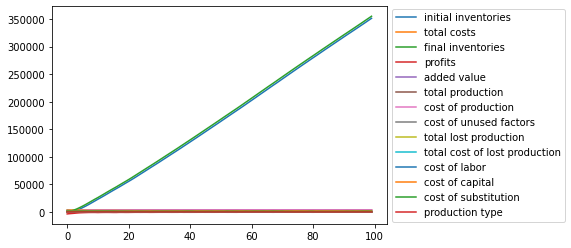

In [19]:
sumOfBalanceSheetSubset.drop(['firm class type'], axis=1).plot()
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

<AxesSubplot: >

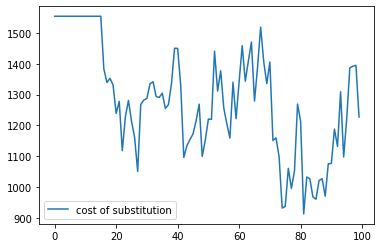

In [20]:
sumOfBalanceSheetSubset[['cost of substitution']].plot()

<AxesSubplot: >

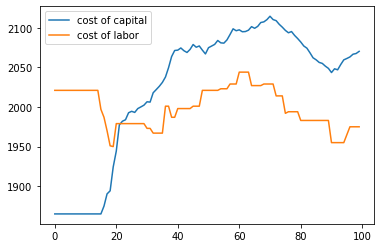

In [21]:
sumOfBalanceSheetSubset[['cost of capital', 'cost of labor']].plot()

# The National Economic Balance Table

In [22]:
allFirmData[['initial inventories', 'added value', 'final inventories']]

,initial inventories,added value,final inventories
0,0.000000e+00,2097.083333,2.097083e+03
1,2.097083e+03,4148.500000,6.245583e+03
2,6.245583e+03,5392.000000,1.163758e+04
3,1.163758e+04,6324.250000,1.796183e+04
4,1.796183e+04,6752.250000,2.471408e+04
...,...,...,...
95,1.183618e+06,14260.916667,1.197879e+06
96,1.197879e+06,14198.833333,1.212078e+06
97,1.212078e+06,14205.416667,1.226283e+06
98,1.226283e+06,14135.750000,1.240419e+06
